# <center>Cancer Diagnosis Analytics Dashboard</center>

# 1. Data Acquisition And Overview #

## Introduction To Project

This project analyzes breast cancer data to help improve diagnosis and treatment planning. Using a UK-based dataset of 2,000+ patients (METABRIC), we explore patterns in cancer outcomes and build tools to predict patient risks. The goal is to create an interactive dashboard that helps healthcare professionals make data-driven decisions.

## Dataset Overview

The METABRIC (Molecular Taxonomy of Breast Cancer International Consortium) dataset contains genomic and clinical information for breast cancer patients. The dataset includes:

- RNA expression data for various genes
- Mutation information
- Patient clinical data
- Treatment and outcome information

## Objectives

1. **Explore Patient Data**: Analyze cancer gene expression patterns and molecular characteristics
2. **Predict Outcomes**: Build models to forecast survival risks and treatment success
3. **Optimize Care**: Identify factors that improve diagnosis speed and resource use
4. **Create Dashboard**: Develop an interactive tool for visualizing key insights

## Hypotheses

1. **Molecular Subtype Hypothesis**: Breast cancer molecular subtypes will show significant differences in 5-year survival rates. We expect Luminal A patients to have >85% survival rate compared to <60% for Basal-like subtypes.

2. **Age and Treatment Response Hypothesis**: Patients diagnosed under 45 years old will show different treatment response patterns compared to those over 70. Younger patients will have more aggressive tumors but better response to chemotherapy.

3. **Genomic Marker Prediction Hypothesis**: A combination of 3-5 key genetic markers will predict treatment outcomes with >75% accuracy.

4. **Tumor Characteristics and Survival Hypothesis**: Tumor size and lymph node involvement will be stronger predictors of survival than patient age.

5. **Treatment Optimization Hypothesis**: Machine learning models can identify optimal treatment protocols for specific patient subgroups.

## Imports And Settings


### Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from datetime import datetime

In [24]:
import sys
print(sys.executable)

c:\Users\User\Documents\CODE INSTITUTE\Final Project\Cancer-Diagnosis-Analytics-Dashboard\venv\Scripts\python.exe


### Configure Visualization Settings

In [25]:
plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn style for plots
sns.set(font_scale=1.2)  # Increase font size for better readability
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size
plt.rcParams['axes.labelsize'] = 12  # Set axis label size

### Display Settings For Pandas

In [26]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show more rows
pd.set_option('display.width', 1000)        # Wider display
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats

### Record Execution Time For Performance Tracking

In [27]:
start_time = datetime.now()
print(f"Notebook execution started at: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

Notebook execution started at: 2025-03-15 22:18:56


## Data Loading and Initial Examination

In [28]:
# Define file path and load dataset
data_path = '../data/raw/METABRIC_RNA_Mutation.csv'

# Check if file exists before loading
if os.path.exists(data_path):
    print(f"Loading dataset from: {data_path}")
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
else:
    print(f"ERROR: File not found at {data_path}")
    print("Please ensure the METABRIC_RNA_Mutation.csv file is in the data/raw directory")
    # Create a small sample dataset for demonstration if file is missing
    df = pd.DataFrame({'sample_id': range(5), 'gene1': np.random.randn(5)})
    print("Created sample dataset for demonstration purposes")

# Display the first few rows of the dataset
print("\n--- First 5 rows of the dataset ---")
display(df.head())

Loading dataset from: ../data/raw/METABRIC_RNA_Mutation.csv


C:\Users\User\AppData\Local\Temp\ipykernel_9392\1256761933.py:7: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Dataset loaded successfully. Shape: (1904, 693)

--- First 5 rows of the dataset ---


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha


## Basic Dataset Information

In [29]:
# Display basic information about the dataset
print("\n--- Dataset Information ---")
df.info()

# Get summary statistics for numerical columns
print("\n--- Summary Statistics ---")
display(df.describe())

# Check the shape of the dataset
rows, cols = df.shape
print(f"\nDataset dimensions: {rows} rows × {cols} columns")

# Check column names and types
print("\n--- Column Data Types ---")
column_types = df.dtypes.value_counts()
print(f"Number of columns by data type:\n{column_types}")

# Identify potential ID columns
id_columns = [col for col in df.columns if 'id' in col.lower()]
print(f"\nPotential ID columns: {id_columns}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates} ({duplicates/len(df):.2%} of data)")


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB

--- Summary Statistics ---


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.00,1904.00,1904.00,1904.00,1832.00,1904.00,1904.00,1859.00,1904.00,1904.00,1904.00,1904.00,1884.00,1403.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.0


Dataset dimensions: 1904 rows × 693 columns

--- Column Data Types ---
Number of columns by data type:
float64    498
object     190
int64        5
Name: count, dtype: int64

Potential ID columns: ['patient_id', 'arid1a', 'arid1b', 'arid2', 'arid5b', 'arid1a_mut', 'arid1b_mut', 'arid2_mut', 'arid5b_mut']

Number of duplicate rows: 0 (0.00% of data)


## Missing Value Analysis


--- Missing Value Analysis ---
Found 13 columns with missing values:


,Missing Values,Percentage
tumor_stage,501,26.31
3-gene_classifier_subtype,204,10.71
primary_tumor_laterality,106,5.57
neoplasm_histologic_grade,72,3.78
cellularity,54,2.84
mutation_count,45,2.36
er_status_measured_by_ihc,30,1.58
type_of_breast_surgery,22,1.16
tumor_size,20,1.05
cancer_type_detailed,15,0.79


FileNotFoundError: [Errno 2] No such file or directory: '../static/images/missing_values_heatmap.png'

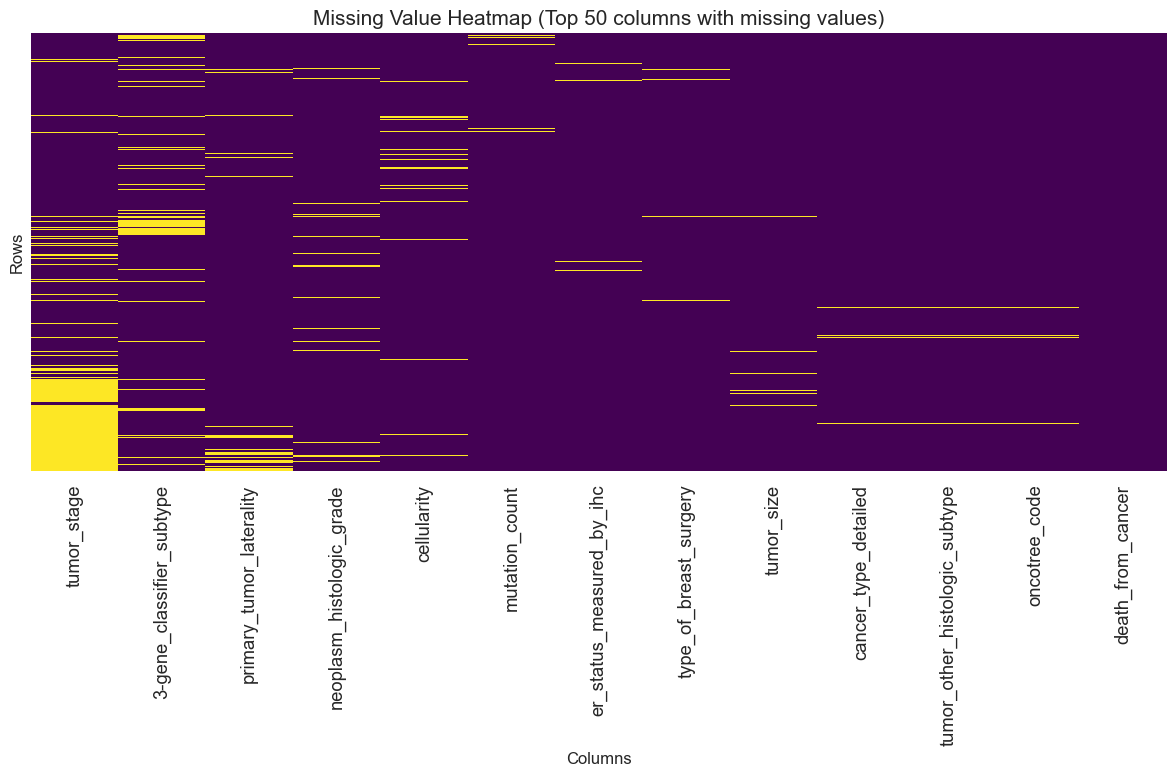

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a missing values summary dataframe
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing values (if any)
missing_cols = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

print("\n--- Missing Value Analysis ---")
if len(missing_cols) > 0:
    print(f"Found {len(missing_cols)} columns with missing values:")
    display(missing_cols)
else:
    print("No missing values found in the dataset.")

# Visualize missing values if any exist
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 8))
    plt.title('Missing Value Heatmap (Top 50 columns with missing values)', fontsize=15)
    
    # If there are many columns, only plot the top 50 with missing values
    cols_to_plot = missing_cols.index[:50] if len(missing_cols) > 50 else missing_cols.index
    
    # Create the heatmap
    sns.heatmap(df[cols_to_plot].isnull(), 
                cbar=False, 
                yticklabels=False,
                cmap='viridis')
    
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Rows', fontsize=12)
    plt.tight_layout()
    plt.savefig('../static/images/missing_values_heatmap.png')
    plt.show()

## Data Distribution Overview


--- Distribution of Sample Numeric Features (10 of 503) ---


FileNotFoundError: [Errno 2] No such file or directory: '../static/images/numeric_distributions.png'

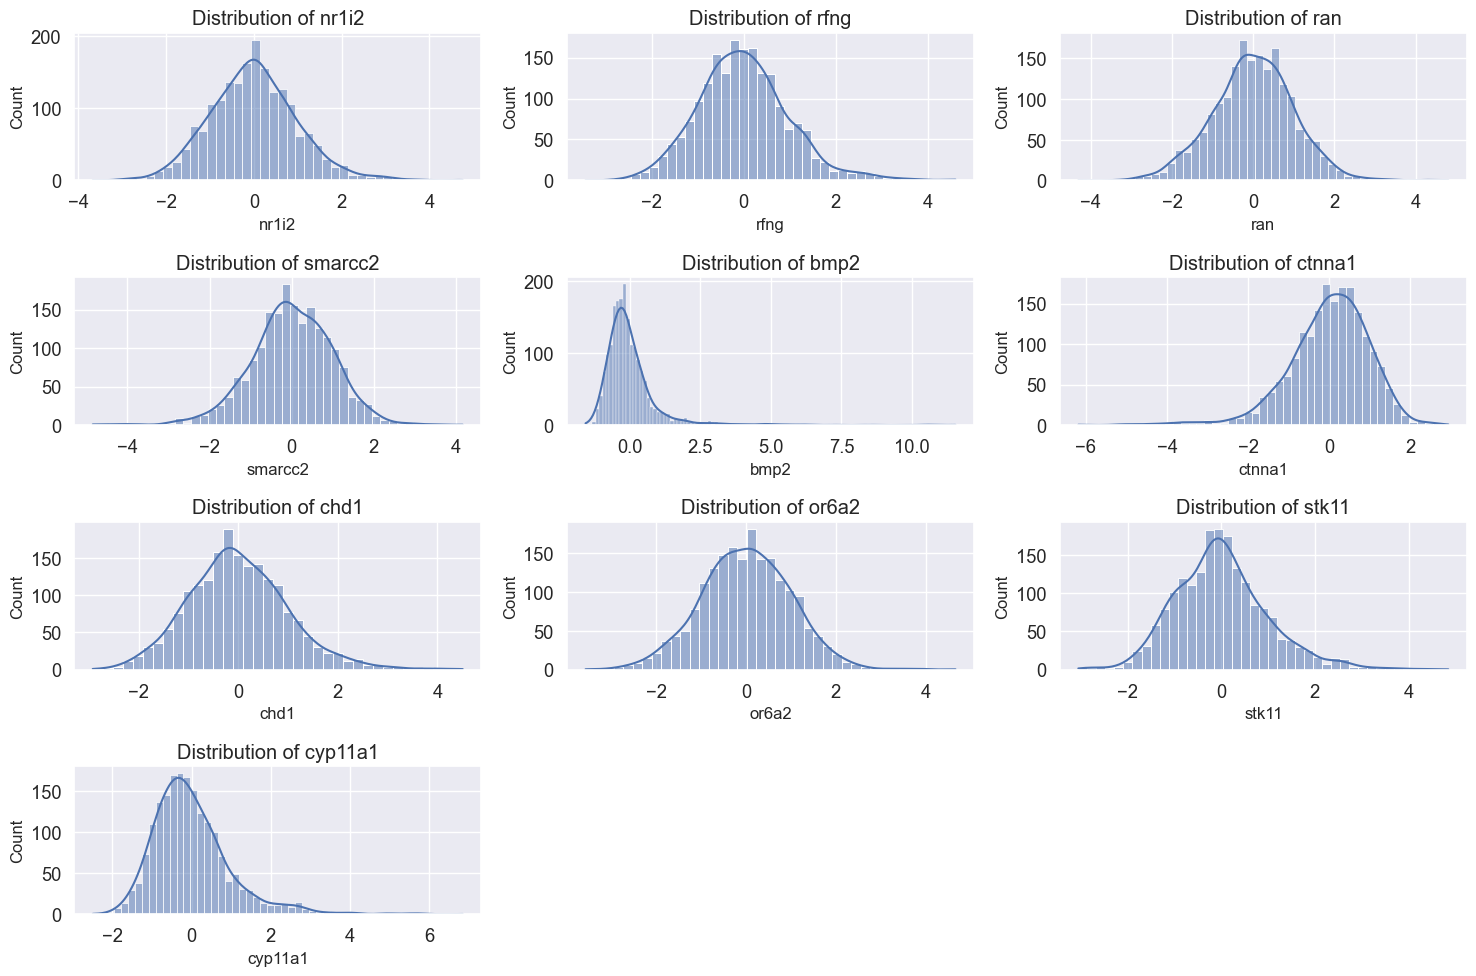

In [31]:
# Analyze the distribution of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Select a subset of numeric columns for visualization
# If there are many columns, select a sample
if len(numeric_cols) > 10:
    sample_cols = np.random.choice(numeric_cols, size=10, replace=False)
    print(f"\n--- Distribution of Sample Numeric Features (10 of {len(numeric_cols)}) ---")
else:
    sample_cols = numeric_cols
    print(f"\n--- Distribution of All Numeric Features ({len(numeric_cols)}) ---")

# Create histograms for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.savefig('../static/images/numeric_distributions.png')
plt.show()

# Analyze categorical columns if present
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"\n--- Categorical Column Analysis ({len(categorical_cols)} columns) ---")
    
    # For each categorical column, show value counts
    for col in categorical_cols:
        print(f"\nUnique values in '{col}':")
        value_counts = df[col].value_counts()
        total_count = len(df)
        
        # Display top 10 categories with percentages
        display(pd.DataFrame({
            'Count': value_counts[:10],
            'Percentage': (value_counts[:10] / total_count * 100).round(2)
        }))
        
        # Plot distribution if not too many unique values
        if len(value_counts) <= 15:
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, data=df, order=value_counts.index[:15])
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.tight_layout()
            plt.savefig(f'../static/images/categorical_{col}.png')
            plt.show()


## Gene Expression Overview


--- Gene Expression Overview (Sample of 100 genes) ---
Total number of gene features: 498


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
age_at_diagnosis,1904.00,61.09,12.98,21.93,51.38,61.77,70.59,96.29,0,0.00
chemotherapy,1904.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00,0,0.00
cohort,1904.00,2.64,1.23,1.00,1.00,3.00,3.00,5.00,0,0.00
neoplasm_histologic_grade,1832.00,2.42,0.65,1.00,2.00,3.00,3.00,3.00,72,3.78
hormone_therapy,1904.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...
kdm5a,1904.00,0.00,1.00,-4.38,-0.64,-0.03,0.56,5.71,0,0.00
lfng,1904.00,0.00,1.00,-2.97,-0.69,-0.02,0.67,3.11,0,0.00
maml1,1904.00,0.00,1.00,-3.81,-0.63,-0.03,0.62,4.41,0,0.00
maml2,1904.00,-0.00,1.00,-2.41,-0.65,-0.12,0.46,7.69,0,0.00


FileNotFoundError: [Errno 2] No such file or directory: '../static/images/gene_expression_boxplot.png'

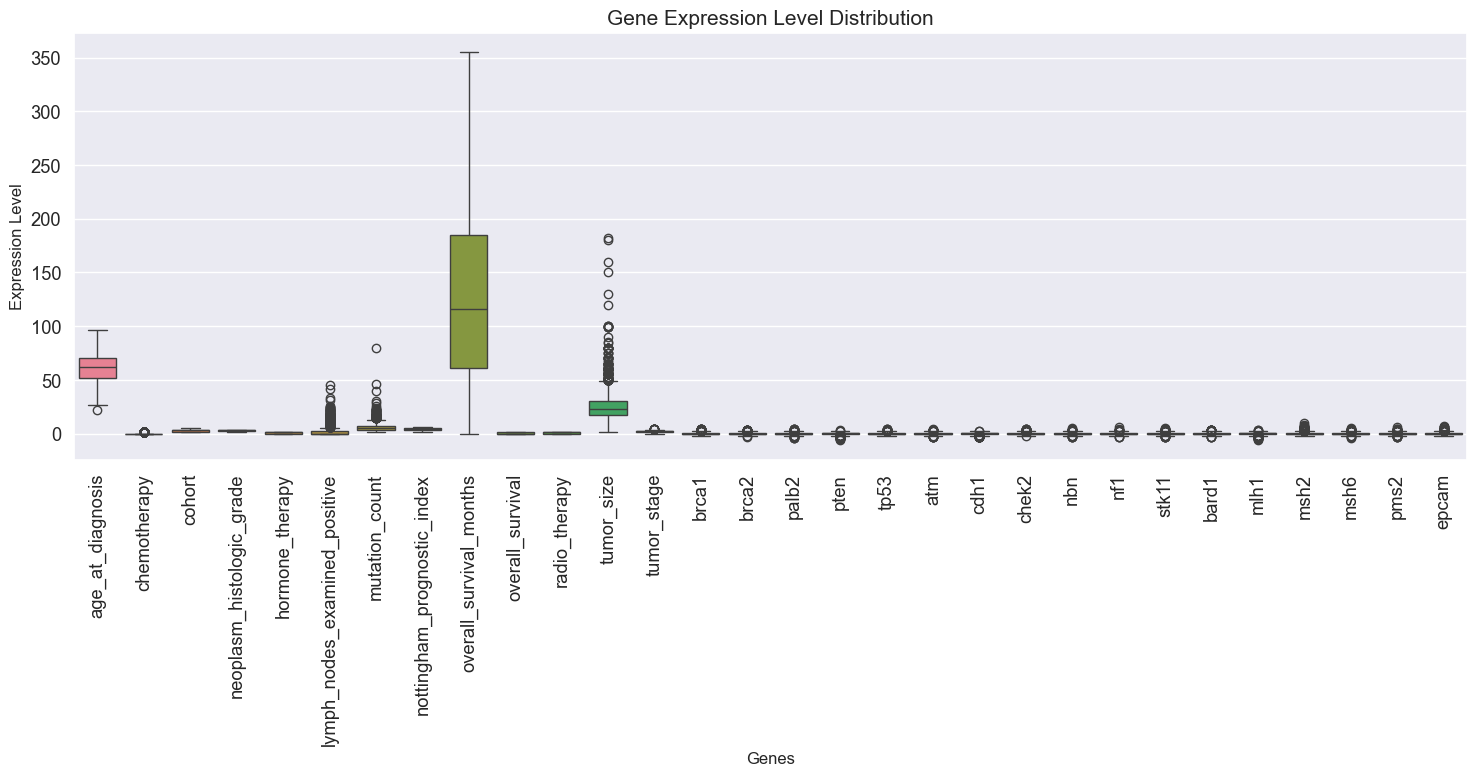

In [32]:
# Identify gene expression columns (exclude ID and metadata columns)
# Assuming gene expression columns are numeric and not ID columns
gene_cols = [col for col in numeric_cols if col not in id_columns]

# If there are too many genes, analyze just a sample
gene_sample = gene_cols[:100] if len(gene_cols) > 100 else gene_cols

print(f"\n--- Gene Expression Overview (Sample of {len(gene_sample)} genes) ---")
print(f"Total number of gene features: {len(gene_cols)}")

# Basic statistics for gene expression
gene_stats = df[gene_sample].describe().T
gene_stats['missing'] = df[gene_sample].isnull().sum()
gene_stats['missing_pct'] = (df[gene_sample].isnull().sum() / len(df) * 100).round(2)

display(gene_stats)

# Visualization of gene expression distributions
plt.figure(figsize=(15, 8))
plt.title('Gene Expression Level Distribution', fontsize=15)

# Create boxplot for the first 30 genes to show expression variability
genes_to_plot = gene_sample[:30]
sns.boxplot(data=df[genes_to_plot])
plt.xticks(rotation=90)
plt.xlabel('Genes')
plt.ylabel('Expression Level')
plt.tight_layout()
plt.savefig('../static/images/gene_expression_boxplot.png')
plt.show()

## Correlation Analysis


--- Correlation Analysis (Sample of Genes) ---
Analyzing correlations between 20 gene features


FileNotFoundError: [Errno 2] No such file or directory: '../static/images/gene_correlation_heatmap.png'

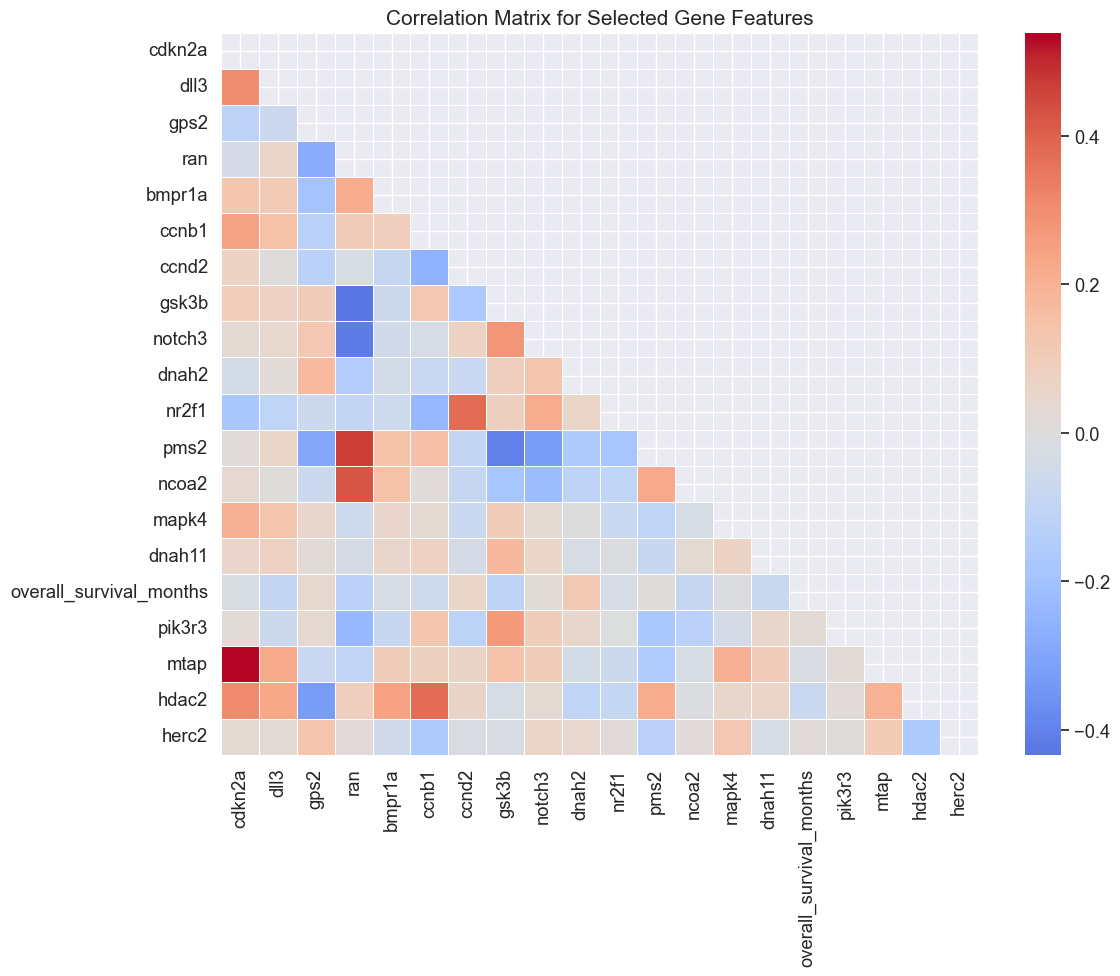

In [33]:
# Select a subset of genes for correlation analysis
# Using too many features in a correlation matrix can make it unreadable
corr_sample = np.random.choice(gene_cols, size=min(20, len(gene_cols)), replace=False)

print("\n--- Correlation Analysis (Sample of Genes) ---")
print(f"Analyzing correlations between {len(corr_sample)} gene features")

# Calculate correlation matrix
correlation = df[corr_sample].corr()

# Create heatmap of correlations
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, 
            cmap='coolwarm', 
            annot=False,
            mask=mask,
            center=0,
            linewidths=0.5)
plt.title('Correlation Matrix for Selected Gene Features', fontsize=15)
plt.tight_layout()
plt.savefig('../static/images/gene_correlation_heatmap.png')
plt.show()

# Find the most highly correlated gene pairs
corr_unstack = correlation.unstack()
corr_unstack = corr_unstack.sort_values(ascending=False)

# Remove self-correlations (which are always 1.0)
high_corr = corr_unstack[corr_unstack < 1.0]

print("\nTop 10 highest gene correlations:")
display(high_corr.head(10))

print("\nTop 10 lowest gene correlations:")
display(high_corr.tail(10))

## Metadata Analysis And Dataset Summary

In [35]:
# Create a summary of the dataset
print("\n--- Dataset Summary ---")
print(f"Total number of samples: {rows}")
print(f"Total number of features: {cols}")
print(f"Number of potential gene expression features: {len(gene_cols)}")

# Check for potential metadata columns (non-numeric columns that might contain relevant info)
metadata_cols = [col for col in df.columns if col not in numeric_cols and col not in id_columns]
print(f"Number of metadata columns: {len(metadata_cols)}")
if metadata_cols:
    print(f"Metadata columns: {metadata_cols}")

# Create dataset summary to be saved as a reference
summary_dict = {
    'Dataset': 'METABRIC RNA and Mutation Data',
    'Rows': rows,
    'Columns': cols,
    'ID Columns': id_columns,
    'Missing Value Columns': len(missing_cols),
    'Duplicate Rows': duplicates,
    'Gene Expression Features': len(gene_cols),
    'Execution Date': datetime.now().strftime('%Y-%m-%d')
}

# Convert to DataFrame for nicer display
summary_df = pd.DataFrame([summary_dict])
display(summary_df)

# Save summary to CSV for future reference
summary_df.to_csv('../data/processed/dataset_summary.csv', index=False)
print("Dataset summary saved to '../data/processed/dataset_summary.csv'")


--- Dataset Summary ---
Total number of samples: 1904
Total number of features: 693
Number of potential gene expression features: 498
Number of metadata columns: 186
Metadata columns: ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer', 'pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut', 'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut', 'cdh1_mut', 'dnah2_mut', 'kmt2d_mut', 'ush2a_mut', 'ryr2_mut', 'dnah5_mut', 'herc2_mut', 'pde4dip_mut', 'akap9_mut', 'tg_mut', 'birc6_mut', 'utrn_mut', 'tbx3_mut', 'col6a3_mut', 'lama2_mut', 'notch1_mut', 'cbfb_mut', 'ncor2_mut', 'col12a1_mut', 'col22a1_mut', 'pten_mut', 'akt1_mut', 'at

,Dataset,Rows,Columns,ID Columns,Missing Value Columns,Duplicate Rows,Gene Expression Features,Execution Date
0,METABRIC RNA and Mutation Data,1904,693,"[patient_id, arid1a, arid1b, arid2, arid5b, ar...",13,0,498,2025-03-15


Dataset summary saved to '../data/processed/dataset_summary.csv'
